---
title: Splines
venue: Modules
---

## 1D Piecewise Interpolation : Linear

Given a set of points $(x_i,y_i)$, piecewise linear interpolation simply connects the neighboring two points via a straight line segment. The unknown function values $y(x)$ at $x$ within $(x_i,x_{i+1})$ are approximated by the values $\tilde{y}(x)$ on the line as follows:

$y(x)\approx \tilde{y}(x) = y_i + \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i) \quad \text{ for } x\in[x_i,x_{i+1}].$

The Interpolations package contains implemetations for different spline types: https://juliamath.github.io/Interpolations.jl/stable/ 

We can generate a piecewise linear interpolation using this package's in-built routines. 

<b> Example for $y(x)=e^x$: </b> Generate 6 equidistant points $(x_1=0,\dots,x_6=2)$ with grid size $h=0.4$ within $[0,2]$, and evaluate $y_i=y(x_i)$. Then we can see these points $(x_i,y_i), i=1,\dots,6$ to interpolate the values on all remaining poinits in $[0,2]$.

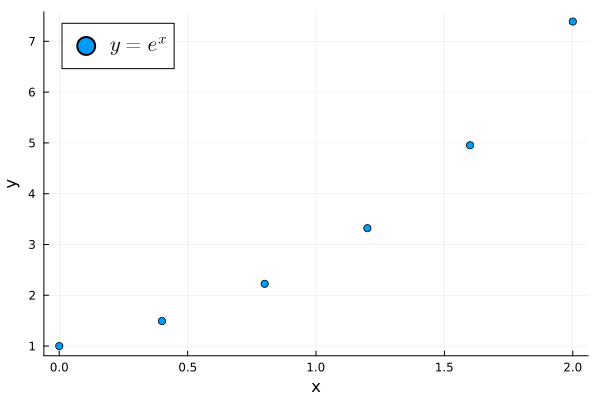

In [1]:
#Generate 6 points used for interpolation of y(x)=e^(x)
xs = 0:0.4:2.0
A = exp.(xs);

#Plot points
using Plots
using LaTeXStrings


plot(xs,A, seriestype=:scatter, label=L"y=e^x",legendfontsize=14)

#Set plot axis
xlabel!("x")
ylabel!("y")

Now generate linear interpolation with in-built routine from "Interpolations" package from these 6 points, and check that the interpolated value equals the exact one at one of these points, namely $(1.2, e^{1.2} )$:

In [2]:
using Interpolations
using Printf
#Create linear interpolation object from previous 6 points
linear_interp = linear_interpolation(xs, A);

#Evaluate exact value at known point x=1.2 using printf macro, notice syntax difference to functions
@printf "Interpolated value at x=1.2 is %0.10f, exact function value is %0.10f" linear_interp(1.2) exp(1.2)



Interpolated value at x=1.2 is 3.3201169227, exact function value is 3.3201169227

Now compare the interpolated value with the exact one at a new point within the interval $[0, 2]$, namely $x=1.13$:

In [3]:
#Evaluate exact value at new point using printf macro
@printf "Interpolated value at x=1.13 is %0.10f, exact function value is %0.10f" linear_interp(1.13) exp(1.13)

Interpolated value at x=1.13 is 3.1285661237, exact function value is 3.0956565001

Now evaluate a point $x=2.1$ outside the interval $[0,2]$:

In [4]:
#Error if trying to evauate at value beyond [0,2], extrapolation required
linear_interp(2.1)

LoadError: BoundsError: attempt to access 6-element extrapolate(scale(interpolate(::Vector{Float64}, BSpline(Linear())), (0.0:0.4:2.0,)), Throw()) with element type Float64 at index [2.1]

Extrapolation is needed for evaluation outside the original domain $[0,2]$:

In [5]:
#create linear interpolation object with additional extrapolation
linear_extrap = linear_interpolation(xs, A,extrapolation_bc=Line()) 
@printf "Extrapolated value at x=2.1 is %0.10f, exact function value is %0.10f" linear_extrap(2.1) exp(2.1)

Extrapolated value at x=2.1 is 7.9980620176, exact function value is 8.1661699126

Compare interpolation with exact values:

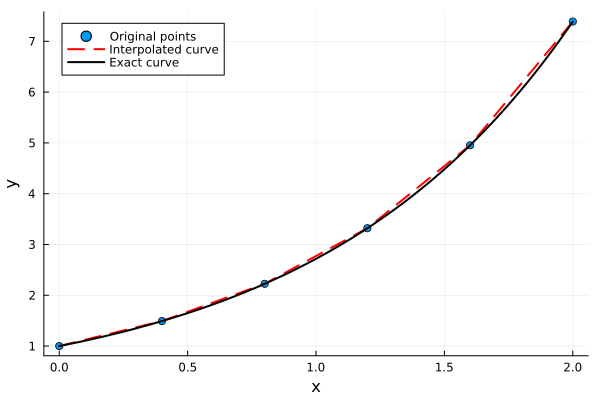

In [6]:
using Plots

#Create fine grid with smaller stepsize 0.02 compared to original 0.4 used for interpolation
xf=0.0:0.02:2.0

#Evaluate values on finer grid using linear interpolation from coarser grid
y_interpolated=linear_interp.(xf);
y_exact=exp.(xf);

#= Specify curves for plotly
trace1 = Plotly.scatter(x=xs, y=A,mode="markers",name="Original points")

trace2 = Plotly.scatter(x=xf, y=y_interpolated,   line=attr(color="red", width=1,dash="dash"), 
                  mode="lines",name="Linear interpolation")

trace3 = Plotly.scatter(x=xf, y=y_exact, line=attr(color="black", width=1,dash="solid"), 
mode="lines", name="Exact values")



# Specify layout, i.e. axis labels

layout = Layout(title="Linear Interpolation for the exponential function",

                   xaxis_title="x",

                   yaxis_title="y")

# Make plot
Plotly.plot([trace1, trace2,trace3],layout)
=#



#Original points on coarse grids used for interpolation
scatter(xs,A, label="Original points",markershape=:circle)

#Linearly interpolated points on finer grid
plot!(xf,y_interpolated, label="Interpolated curve",lc=:red,lw=2,ls=:dash)

#exact function values
plot!(xf,exp.(xf), label="Exact curve",lc=:black,lw=2,ls=:solid)
xlabel!("x")
ylabel!("y")


# Higher order spline interpolations: Cubic

In [7]:
# Generate cubic spline object from the same 6 points
cubic_interp = cubic_spline_interpolation(xs, A);

# Make cubic interpolation for points on finer grid
y_cubic=cubic_interp.(xf);

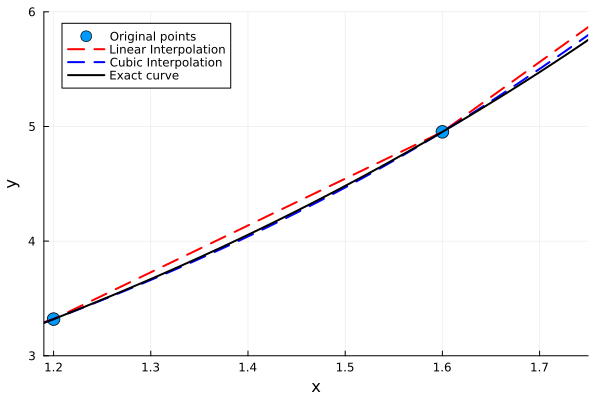

In [8]:
#=
# Generate curves for comparison
trace1 = Plotly.scatter(x=xs, y=A,mode="markers",name="Original points")

trace2 = Plotly.scatter(x=xf, y=y_interpolated,   line=attr(color="red", width=1,dash="dash"), 
                  mode="lines",name="Linear interpolation")

trace3 = Plotly.scatter(x=xf, y=y_cubic,   line=attr(color="blue", width=1,dash="dot"), 
                  mode="lines",name="Cubic interpolation")


trace4 = Plotly.scatter(x=xf, y=y_exact, line=attr(color="black", width=1,dash="solid"), 
mode="lines", name="Exact values")



# Specify layout, i.e. axis labels

layout = Layout(title="Linear and cubic interpolation for the exponential function",

                   xaxis_title="x",

                   yaxis_title="y")

# Make plot, compare with linear spline and exact values
Plotly.plot([trace1, trace2,trace3,trace4],layout)
=#


scatter(xs,A, label="Original points",markershape=:circle, ms=7)

#Linearly interpolated points on finer grid
plot!(xf,y_interpolated, label="Linear Interpolation",lc=:red,lw=2,ls=:dash)

#Cubic interpolated points on finer grid
plot!(xf,y_cubic, label="Cubic Interpolation",lc=:blue,lw=2,ls=:dash)

#exact function values
plot!(xf,exp.(xf), label="Exact curve",lc=:black,lw=2,ls=:solid)

#plot axis label
xlabel!("x")
ylabel!("y")

#Zoom into plot to see differences 
xlims!(1.19,1.75)
ylims!(3.0,6)


# In-class exercise

The following are exercises 3,4 from chapter 5.3 of the book homepage at: https://tobydriscoll.net/fnc-julia/localapprox/splines.html. You should use the interpolation routine from the Interpolations package rather than implement your own as shown in the book.

<b>Task 1: </b> For the two functions $y_1,y_2$, intervals, and values of $n$ as specified below, define evenly spaced $n+1$ nodes. Then use the previous linear and cubic spline routines from the "Interpolations" package to plot the linear and cubic spline interpolant using those nodes, together with the exact function values over the given interval. Make one separate plot for each function. What can you observe?

$y_1(x)=\cos(\pi x^2), x \in I= [0,4], n=18$

$y_2(x)=\sin(1/x), x \in I=[0.5,7], n=9$

<b>Task 2: </b>  Choose one of the functions $y_1(x),y_2(x)$ and its respective interval $I$, calculate its <b>linear</b> interpolants $p_n(x)$ with $n+1=11, 21,41,81,161,321$ equidistant node points on $I$ using the in-built routine as above. Then calculate the maximal  error $E(n)$ for each interpolant with $n$ points via
\begin{equation}
E(n) = \| y-p_n \|_\infty = \max_{x\in I} | y(x) - p_n(x) |
\end{equation}

You can approximate $E(n)$ by evaluating $y(x)$ and $p_n(x)$ on $N=2000$ equidistant points within the interval $I$. 
Plot the error $E(n)$ as a function of $n$, i.e. show $n$ on the $x$ axis and $E(n)$ on the $y$ axis. 

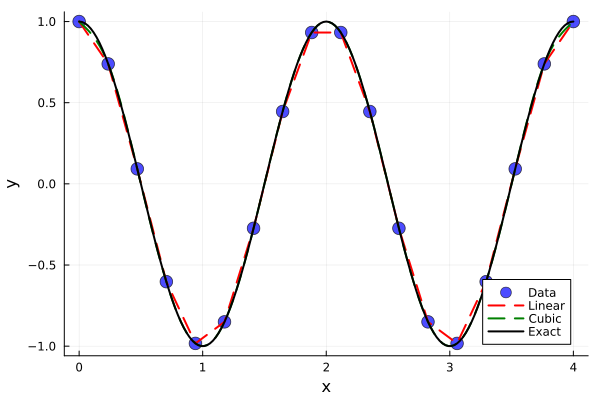

In [14]:
# Packages used
using Interpolations
using Printf

# Generate 6 points used for interpolation of y(x) = cos(π x^2)
x_start = 0
x_stop = 4
n = 18
x_step = (x_stop - x_start)/(n - 1)

xs = x_start:x_step:x_stop
A = cos.(π.*xs)

# Create linear interpolation object from the previous points
linear_interp = linear_interpolation(xs, A)

# Create cubic spline object from the same previous points
cubic_interp = cubic_spline_interpolation(xs, A)

# Create a fine grid with a smaller stepsize
x_step_f = 0.1 * x_step
xf = x_start:x_step_f:x_stop

# Evaluate values on finer grid using interpolation from coarser grid
y_interpolated = linear_interp.(xf)
y_cubic = cubic_interp.(xf)
y_exact = cos.(π.*xf)

# Plots
scatter(xs, A, label="Data", mc=:blue, ms=7, ma=0.7)
plot!(xf, y_interpolated, label="Linear", lc=:red, lw=2, ls=:dash)
plot!(xf, y_cubic, label="Cubic", lc=:green, lw=2, ls=:dash)
plot!(xf, y_exact, label="Exact", lc=:black, lw=2, ls=:solid)
xlabel!("x")
ylabel!("y")

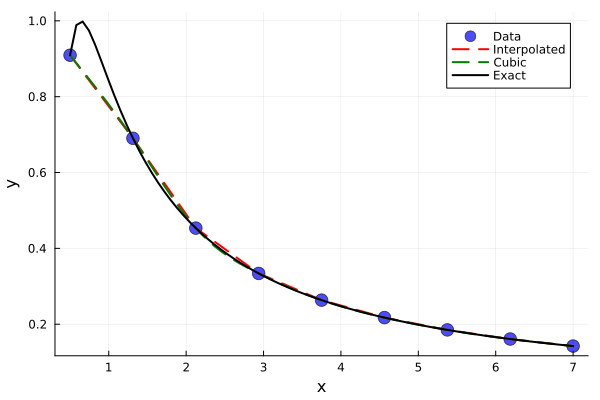

In [13]:
# Packages used
using Interpolations
using Printf

# Generate 6 points used for interpolation of y(x) = cos(π x^2)
x_start = 0.5
x_stop = 7
n = 9
x_step = (x_stop - x_start)/(n - 1)

xs = x_start:x_step:x_stop
A = sin.(1 ./ xs)

# Create linear interpolation object from the previous points
linear_interp = linear_interpolation(xs, A)

# Create cubic spline object from the same previous points
cubic_interp = cubic_spline_interpolation(xs, A)

# Create a fine grid with a smaller stepsize
x_step_f = 0.1 * x_step
xf = x_start:x_step_f:x_stop

# Evaluate values on finer grid using interpolation from coarser grid
y_interpolated = linear_interp.(xf)
y_cubic = cubic_interp.(xf)
y_exact = sin.(1 ./ xf)

# Plots
scatter(xs, A, label="Data", mc=:blue, ms=7, ma=0.7)
plot!(xf, y_interpolated, label="Interpolated", lc=:red, lw=2, ls=:dash)
plot!(xf, y_cubic, label="Cubic", lc=:green, lw=2, ls=:dash)
plot!(xf, y_exact, label="Exact", lc=:black, lw=2, ls=:solid)
xlabel!("x")
ylabel!("y")